<a href="https://colab.research.google.com/github/IyadKhuder/Regression_Multiple_Models/blob/main/Regression_Multiple_Models_v1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this Notebook, I'm covering the following models: 
# I.    Polynomial Regression 
# II.   SVR
# III. Decision Tree
# IV. Random Forest Regression



---



## Case-study: 
*An applicant for the job position "ML engineer" at IDC claimed that his previous gross salary per annum was $65k, given that he worked as a junior ML engineer for 1.5 year and he is assessed to be in the midway between junior and senior ML engineer.*

*Given the data sample of salary averages as a fenction of the position rankings, is he honest or this is a bluff?* 
 🙄 

*Let's build a ML model that estimates the salary of that applicant, and predicts whether he was honest or just bluffing.*

## **Importing main libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## **importing the dataset**

### a) Importing Google-Drive relevant libraries

In [2]:
# libraries for the files in google drive
from pydrive.auth import GoogleAuth
from google.colab import drive
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

### b) Connecting to Google-Drive and importing the dataset file

In [95]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

file_id = 'google drive file id' #<-- You add in here the id from you google drive file, you can find it


# download = drive.CreateFile({'id': '1MXPTJpS5v7W4df5_QGhSklKx9I78ozG-'})
download = drive.CreateFile({'id': '1QV96r9r4BqHHXfnURZrSexMAYbuoGLLK'})

# Download the file to a local disc
download.GetContentFile('salary_vs_position.csv')


### c) Storing the dataset in a dataframe and verifying that we access it

In [96]:
df  = pd.read_csv("salary_vs_position.csv")
df.head()

,Position,Level,Gross_Salary_per_annum in USD
0,Internship Trainee,1,17000
1,Entry-Level,2,36000
2,Junior Analyst,3,42000
3,Senior Analyst,4,50000
4,Junior ML Engineer,5,48000


### d) Extracting the input and output fields

In [97]:
x= df.iloc[:,1:-1].values
y= df.iloc[:,-1].values

### e) Setting the printing options, so numbers are printed as whole numbers, withough scientific format or decimal digits.

In [98]:
np.set_printoptions(suppress=True)
np.set_printoptions(precision=6)
np.set_printoptions(formatter={'float': '{: 0.0f}'.format})

### f) Preview

In [99]:
print(x)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [100]:
print(y)

[ 17000  36000  42000  50000  48000  58000  70000  88000 158000 299000]


# I. Polynomial Regression

# Data Preprocessing

## Training the Linear Regression model on the whole dataset

In [101]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x, y)

LinearRegression()

## Training the Polynomial Regression model on the whole dataset

a) For deg = 3

In [102]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg_3 = PolynomialFeatures(degree=3)
x_poly_3 = poly_reg_3.fit_transform(x)

In [103]:
print(x_poly_3[:,2])

[ 1  4  9  16  25  36  49  64  81  100]


In [104]:
x1_3 = x_poly_3[:,1]
x2_3 = x_poly_3[:,2]
x3_3 = x_poly_3[:,3]

The trick for the polynomila regression model is that it is converted into a multiple Linear Regression, where the powers of x are symbolized as multiple variables "features"

In [105]:
lin_reg_3 = LinearRegression()
lin_reg_3.fit(x_poly_3, y)

LinearRegression()

a) For deg = 5

In [106]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg_5 = PolynomialFeatures(degree=5)
x_poly_5 = poly_reg_5.fit_transform(x)

In [107]:
print(x_poly_5[:,2])

[ 1  4  9  16  25  36  49  64  81  100]


In [108]:
x1_5 = x_poly_5[:,1]
x2_5 = x_poly_5[:,2]
x3_5 = x_poly_5[:,3]

In [109]:
lin_reg_5 = LinearRegression()
lin_reg_5.fit(x_poly_5, y)

LinearRegression()

## Visualising Linear & Polynomial Regression models all together for comparison

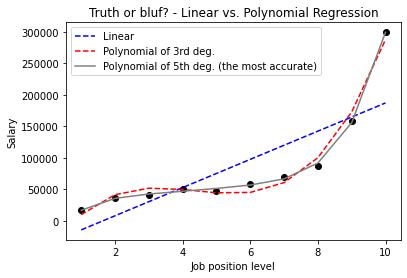

In [110]:
# plotting the real points of the dataset:
plt.scatter(x, y, color = 'black')

# plotting the linear model, as predicted by the trained LinearRegression:
y_predict = lin_reg.predict(x)
plt.plot(x, y_predict, color = 'blue', linestyle='dashed', label='Linear')

# plotting the polynomial model of 3rd degree, 
# as predicted by the trained polynomial Regression poly_reg:
y_predict_3 = lin_reg_3.predict(x_poly_3)
plt.plot(x, y_predict_3, color = 'red', linestyle='dashed', label='Polynomial of 3rd deg.')

# plotting the polynomial model of 5th degree, 
# as predicted by the trained polynomial Regression poly_reg:
y_predict_5 = lin_reg_5.predict(x_poly_5)
plt.plot(x, y_predict_5, color = 'grey', label='Polynomial of 5th deg. (the most accurate)')

plt.title('Truth or bluf? - Linear vs. Polynomial Regression')
plt.xlabel('Job position level')
plt.ylabel('Salary')
plt.legend()
plt.show()

We notice the the polynomial model of 5th degree is the best fit of the graph. However, we should be mindful of the risk of falling into the trap pf an overfitting model.

## Predicting a new result with Linear Regression

In [42]:
np.set_printoptions(precision=2)

In [111]:
x0 = [[5.5]]

In [114]:
y0_lin = lin_reg.predict(x0)

In [115]:
print(y0_lin)

[ 86600]


## **Conclusion:** According to the linear regression model, a salary of $60k is very modest for such an engineer and he deserves much more than that! 😇

## Predicting a new result with Polynomial Regression

In [116]:
x0_pol = poly_reg_5.fit_transform(x0)

In [117]:
y0_pol = lin_reg_5.predict(x0_pol)

In [118]:
print(y0_pol)

[ 54180]


## **Conclusion:** According to the polynomial regression model of 5th degree (which is much more accurate than the linear one), a salary of $65k is pretty higher than the number claimed by the applicant, which means that he's likely to be bluffing 🤥



---



---



# II. Support Vector Regression (SVR)

# Data Preprocessing

## Feature Scaling

In [150]:
y.shape

(10, 1)

In [151]:
y=y.reshape(len(y),1)
y.shape

(10, 1)

Note: without the above command
, we'd get the error
<br> "Expected 2D array, got 1D array instead"
 <br>  for the y array y, when we try the command 
<br> y_scaled = sc_y.fit_transform(y)
<br> in the cell below
 

In [152]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_scaled = sc_x.fit_transform(x)
sc_y = StandardScaler()
y_scaled = sc_y.fit_transform(y)

In [153]:
print(x_scaled)

[[-2]
 [-1]
 [-1]
 [-1]
 [-0]
 [ 0]
 [ 1]
 [ 1]
 [ 1]
 [ 2]]


In [154]:
print(y_scaled)

[[-1]
 [-1]
 [-1]
 [-0]
 [-0]
 [-0]
 [-0]
 [ 0]
 [ 1]
 [ 3]]


## Training the SVR model on the whole dataset

In [155]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x_scaled,y_scaled)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicting a new result

The steps to follow here are:


1.   Scale the input value (position level = 6.5), using the same object, which was used for x; i.e. sc_x
2.   Apply the prediction method on the scaled value
2.   The obtained value of y will be in the scaled form. Therefore, we need to apply the inverse transformation on it to get the corresponding value.

Important note:
For the requested value 6.5,
when we want to scale it, we should use the function sc_x.transform to scale it, NOT sc_x.fit_transform
if we use the latter one, it will override the original scaling for the array x, and scale it according to 6.5
and in that case, the scaled value will be 0, because:
for a single value, the mean is the same as the value itself, and therefore, the scaled value will be (6.5-6.5)/sigma = 0






In [157]:
x0= np.array([[5.5]])

In [158]:
x0_scaled = sc_x.transform(x0)

In [159]:
print(x0_scaled)

[[ 0]]


In [160]:
y0_scaled = regressor.predict(x0_scaled)
print(y0_scaled)

[-0]


In [161]:
y0 = sc_y.inverse_transform([y0_scaled])
print(y0)

[[ 57473]]


Note on the scaling:
When we scale a sample, all the scaled values will be in the range [approx. -2.7, approx. 2.7],
Having applied fit_transform, if we scale a new value, which is beyond the range of the given sample, the scaled value will also be beyond the standard range mentioned above.
In ML models, we usually try to find such extreme values.
For example, the middle value in the array below, will be scaled to a value that is greater than 10000.

In [162]:
x2= np.array([[2,  60000, 7.6]])
x2col = np.transpose(x2)
# x0col = np.transpose(x0)
x2_scaled = sc_x.transform(x2col)
print(x2_scaled)

[[-1]
 [ 20887]
 [ 1]]


## Visualising the SVR results

In [163]:
# Getting the predicted values for the y, based on the trained model:
y_predict_scaled = regressor.predict(x_scaled)
print(y_predict_scaled)




[-1 -1 -1 -0 -0 -0 -0  0  1  1]


In [164]:
y_predict_scaled.shape

(10,)

In [165]:
y_predict = sc_y.inverse_transform([y_predict_scaled])
y_predict.shape

(1, 10)

In [166]:
y_predict_v = np.transpose(y_predict)

In [167]:
y_predict_v.shape

(10, 1)

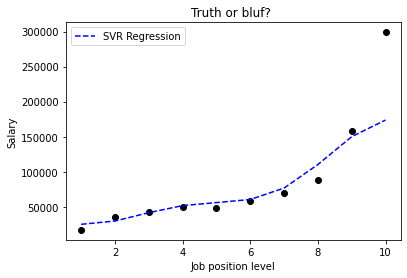

In [168]:
# plotting the real points of the dataset:
plt.scatter(x, y, color = 'black')
# plotting the SVR model, as predicted by the trained SVR Regression:



plt.plot(x, y_predict_v, color = 'blue', linestyle='dashed', label='SVR Regression')

plt.title('Truth or bluf? ')
plt.xlabel('Job position level')
plt.ylabel('Salary')
plt.legend()
plt.show()



---



---



# III. Decision Tree

## Training the Decision Tree Regression model on the whole dataset

In [169]:
from sklearn.tree import DecisionTreeRegressor
# In the following line, we precise the seed of the random function, so we get the same pattern everytime we run the code
TreeRegressor = DecisionTreeRegressor(random_state = 0)
TreeRegressor.fit(x, y)

DecisionTreeRegressor(random_state=0)

## Predicting a new result

In [170]:
TreeRegressor.predict([[5.5]])

array([ 48000])

## Visualising the Decision Tree Regression results (higher resolution)

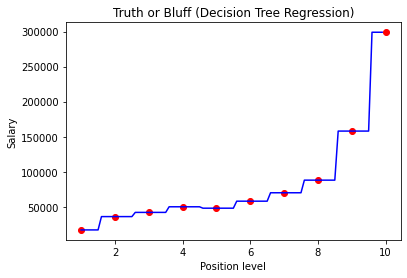

In [176]:
x_grid = np.arange(min(x), max(x), 0.1)
x_grid = x_grid.reshape((len(x_grid), 1))
plt.scatter(x, y, color = 'red')
plt.plot(x_grid, TreeRegressor.predict(x_grid), color = 'blue')
plt.title('Truth or Bluff (Decision Tree Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()



---



---



# IV. Random Forest Regression

## Training the Random Forest Regression model on the whole dataset

In [177]:
from sklearn.ensemble import RandomForestRegressor
my_RandomForestRegressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
my_RandomForestRegressor.fit(x, y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(n_estimators=10, random_state=0)

## Predicting a new result

In [173]:
my_RandomForestRegressor.predict([[5.5]])

array([ 49400])

## Visualising the Random Forest Regression results (higher resolution)

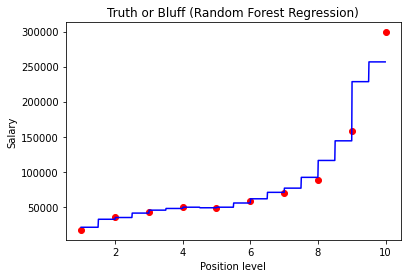

In [178]:
x_grid = np.arange(min(x), max(x), 0.01)
x_grid = x_grid.reshape((len(x_grid), 1))
plt.scatter(x, y, color = 'red')
plt.plot(x_grid, my_RandomForestRegressor.predict(x_grid), color = 'blue')
plt.title('Truth or Bluff (Random Forest Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()